In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mxmh_survey_results.csv')

# Data clean and preprocessing

In [3]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [5]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [6]:
#Check for null values in the fields that we are going to use for analysis

In [7]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [8]:
print(df['Age'].isnull().values.any())

True


In [9]:
print(df['Anxiety'].isnull().values.any())

False


In [10]:
print(df['Depression'].isnull().values.any())

False


In [11]:
print(df['Insomnia'].isnull().values.any())

False


In [12]:
print(df['OCD'].isnull().values.any())

False


In [13]:
df['Age'].mean()

25.206802721088437

In [14]:
#Since there is are nan values for Age, we are going to replae it with the mean value of age
df['Age'] = df['Age'].fillna(25)

In [15]:
print(df['Age'].isnull().values.any())

False


C:\Users\preet\AppData\Local\Temp\ipykernel_11568\3129054254.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(331)


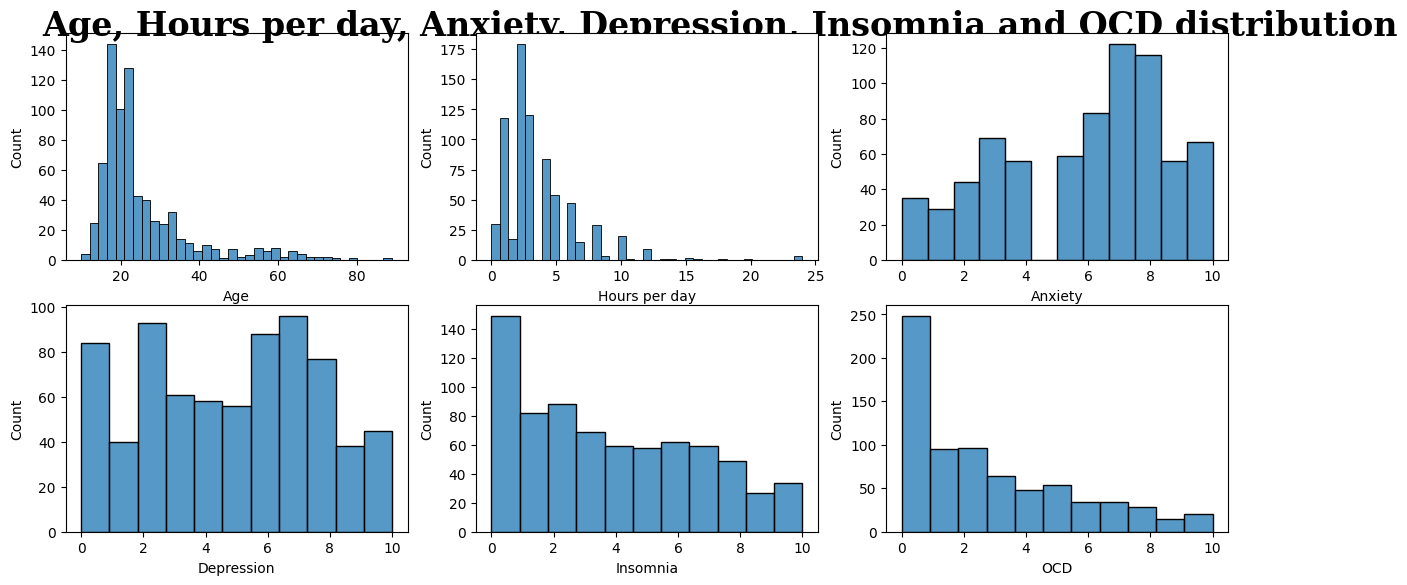

In [16]:
fig, ax = plt.subplots(figsize = (15,10))

plt.subplot(331)
sns.histplot(df['Age'])
plt.text(0, 150,'Age, Hours per day, Anxiety, Depression, Insomnia and OCD distribution', fontweight = 'bold', fontfamily = 'serif', fontsize = 24)
plt.subplot(332)
sns.histplot(df['Hours per day'])
plt.subplot(333)
sns.histplot(df['Anxiety'])
plt.subplot(334)
sns.histplot(df['Depression'])
plt.subplot(335)
sns.histplot(df['Insomnia'])
plt.subplot(336)
sns.histplot(df['OCD'])

plt.savefig('hist-pair-plot.png')

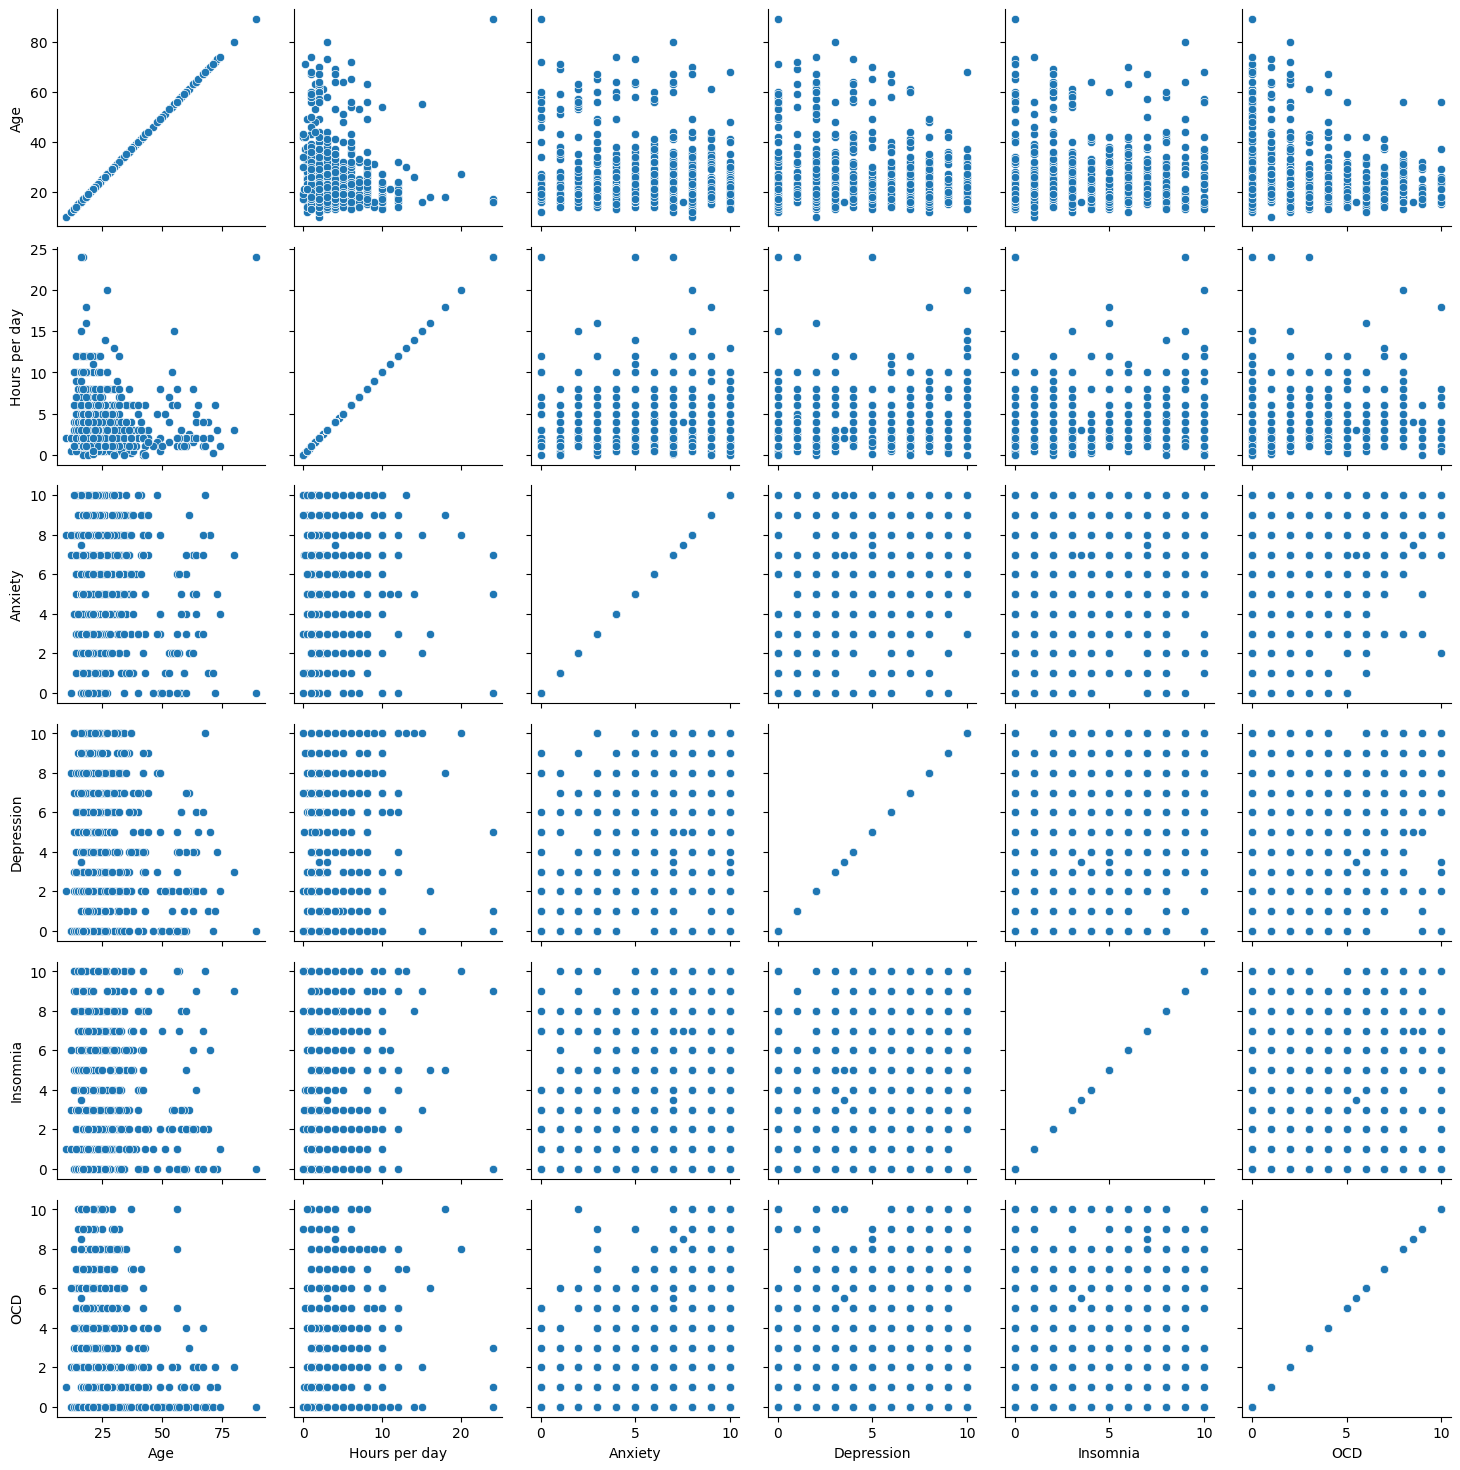

In [17]:
plot = sns.PairGrid(df[['Age', 'Hours per day','Anxiety', 'Depression','Insomnia','OCD']])
plot.map(sns.scatterplot)
plt.savefig('pairgrid.png')

In [18]:
# split data into X and y
feature_names = ['Age','Anxiety','Depression','Insomnia','OCD']
X = df[feature_names]
y_copy = df['Fav genre']

In [19]:
selected_df = df[['Fav genre','Hours per day', 'Age','Anxiety','Depression','Insomnia','OCD']]

In [20]:
selected_df.head()

,Fav genre,Hours per day,Age,Anxiety,Depression,Insomnia,OCD
0,Latin,3.0,18.0,3.0,0.0,1.0,0.0
1,Rock,1.5,63.0,7.0,2.0,2.0,1.0
2,Video game music,4.0,18.0,7.0,7.0,10.0,2.0
3,Jazz,2.5,61.0,9.0,7.0,3.0,3.0
4,R&B,4.0,18.0,7.0,2.0,5.0,9.0


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
#Lebel the unique values - from the xgboost latest version it only accepts numbered values as labels
df['Fav genre'] = le.fit_transform(df['Fav genre'])
Y = df['Fav genre']

In [23]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,8,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,14,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,15,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,6,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,12,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [24]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size =test_size ,random_state=seed)

# Scaling

In [25]:
#apply scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xgboost

In [26]:
#Xgboost analysis
from xgboost import XGBClassifier

In [27]:
# fit model no training data
model_xg = XGBClassifier()
model_xg = model_xg.fit(X_train, y_train)
model_xg

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [28]:
# make predictions for test data
y_pred_xg = model_xg.predict(X_test)

In [29]:
print(y_pred_xg)

[ 6  6  5  3 11  0 10 10 14 11 14 14 11 10  5  6 11  0 14 15  5  3 14 11
 14  1 14 14 14 11  0 15  0  0 14  5  6 14  0  6  0 11  0  1 10 11 14 15
 10 15 14  0 11 10 14  0 14 15  6 14 11 10 14 10 14 14 12  1  0 11 11  0
 11 10 14  2 14 14  1 14 14 15 15 11 14 11 15  1 14  2 11 14 11 14  0 14
  0  2 10  3  5 15  5 11  1 11 14  3  5 14 12 14 14 14 11 14 14  0 14 11
  0 10 11 15 11 14 14 14  1  2 10  0 11 11 12 14 14 14 14 11 11 14 11 14
 14 13 14 14  5  9 15 11 14 10 11 11 13 14 14 14 11  3 11 14 14  5 14 11
 14 11 14 11 14 11 11 11 14 15 14  2 11 14  6 11  5  2 14 14  2 11 11  2
 11  9 14  2 10  0 14 14 10 11 11  9 14 14  2  1  1  0 14  2  5 11 10 11
 10 14 14  8 11 14  7 15 14 11 14  3 11  5  5 11 15  6  0 10 14 14 10 11
  7 14 14]


In [30]:
# evaluate predictions
print('Accuracy of XGBoost on training set: {:.2f}'
     .format(model_xg.score(X_train, y_train)))
print('Accuracy of XGBoost on test set: {:.2f}'
     .format(model_xg.score(X_test, y_test)))
accuracy = accuracy_score(y_test, y_pred_xg)
print("XGBoost - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of XGBoost on training set: 0.99
Accuracy of XGBoost on test set: 0.16
XGBoost - Accuracy for Fav genre: 16.46%


## Xgboost feature importance

In [31]:
xg_feature_importances = model_xg.feature_importances_
print(model_xg.feature_importances_)

[0.22834422 0.19608153 0.1790171  0.21025108 0.18630615]


# Random Forest Classification

In [32]:
#Random Forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [33]:
model_rfr = RandomForestClassifier()
model_rfr.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# make predictions for test data
y_pred_rfr = model_rfr.predict(X_test)
print(y_pred_rfr)

[ 6  6  5 13 11  0 10 14 14 11 14 14 14  2 10 10 11 15 14 10 11  3 14 11
 14 14 14 14 14 11 14 14  5  0 10 10  2  8  0  0  0 11 14  1 14 13 14 14
 10  3 14  0 11 14 14  0 14 11 15 14 13 10 14 10 14 14 12  1 13 11 11  0
  7 10 14  2 14 15 10 14 10 15 11 11 11 11 15 14 14 11  2 14 13 14 14 10
  0 11 10 14  5 15 15 11  1 11 14 14 14 14  2 14 14 14 14 14 14 14 14 11
  0 11 11 14 11 14 10 14 15  2 14  0  5  2 12 14 11 14 14 11 11 14 14 14
 14  3 15 14  5  0 15 14 11 10 11 14 13 14 14 14 11  1  2 11 14  1 14 11
 14 11 14 11 10 11 11 11 14 15 14  2 14 14 14 14  5  2  1 14 14 11 11 10
 14  7 14  2 14 10 14 14 12 12 11  9 11 14 14 14 11  0 11  1  5 12 14 14
 10 14 10 14 11 14 11 12 11 11 14  3 14 14 13 11 11 14  0 10 14 14 14 14
 12 14 14]


In [36]:
# evaluate predictions
print('Accuracy of Random Forest Regression on training set: {:.2f}'
     .format(model_rfr.score(X_train, y_train)))
print('Accuracy of Random Forest Regression on test set: {:.2f}'
     .format(model_rfr.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_rfr)
# print("Random Forest Regression - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of Random Forest Regression on training set: 0.99
Accuracy of Random Forest Regression on test set: 0.21


## Random forest feature importance

In [37]:
rfr_feature_importances = model_rfr.feature_importances_
print(model_rfr.feature_importances_)

[0.27711173 0.18776001 0.18479157 0.17733583 0.17300085]


# KNeighbors Classification

In [38]:
#KNeighbors classification
from sklearn.neighbors import KNeighborsClassifier  

In [39]:
model_knr = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
model_knr.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
# make predictions for test data
y_pred_knr = model_knr.predict(X_test)
print(y_pred_knr)

[14  6  5  3 14  0 10 14 11 11  1 14  7  6  0 10  6 11 14  2 11  0 14 11
  5 14 14  5 14 11  0  0  0 11 14 14  1 11  2  1 11 12 14 11 14  6 10  1
 10 10 14  2  3  5  5 11 14 11  6  7  1 10  3  3 14 10  7  5  0  7  2 12
 11 14 14  2 14 14  0 14 14 11 15 11 11 11  6 14 14 11  2 14  6  1 14 10
  5 14  9 14  0 14 11 11  2 10 14  7  5 14  2  1 14 10 14 14  2  7  0 11
  0 11 14  2 11  4 14 10  1  2 14  6  0  0 12 10 11  2 11  0  6 14 14 14
 11  3 14 14  1 11 14 11 11 10 11 10  0 14 14 11  2  1 11 11  0  0 11 11
 14  5 15  1  1 14 11 11 14 11 11 11  7 14  3 14 11  2  0 14  2 11 11  1
 14 11 14 14 14  0 14 10 10 13  0  0 11 14 14  1 14  2  1  2 10 14 10  1
  2 14 10  6  1 14 14  1  1  3 14 14 14  2  0 11 14 14  2 14 11 14 14 14
 14  1 10]


In [41]:
# evaluate predictions
print('Accuracy of knn Regression on training set: {:.2f}'
     .format(model_knr.score(X_train, y_train)))
print('Accuracy of knn Regression on test set: {:.2f}'
     .format(model_knr.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_knr)
# print("Linear Regression - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of knn Regression on training set: 0.41
Accuracy of knn Regression on test set: 0.18


In [42]:
# feature importance is not defined for KNN classifier

# Decision Tree Classification

In [43]:
#Decision Tree classification
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Inlcuded tree prunning by handling the hyperparameters
model_cart = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
model_cart.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [45]:
# make predictions for test data
y_pred_cart = model_cart.predict(X_test)

In [46]:
print(y_pred_cart)

[11  0 14 11 11  0 14 14 10 11 11 14 14  0 14  0  0  0 14 14 11 14 14 14
 14 11 14 14 14 11  0 14  0 11 14 11  0 14  0  0 14 14 14  0 14 14 10 14
 14 14  0  0 14 14 11 14 14 11 14 14  0 14 11 14 14 14  0  0 14 14 14 14
 14 14 14 14 14 14  0 14 14  0 11 11 11 11  0 14 14 14 14 14  0 11 14  0
  0 11 14 11  0 14 14 11  0 14 11 14  0 14 14 11 14 14 11 14 14 14 14 11
  0 11 14 14 11 14 14 14  0 14 14  0 14  0 14 14  0 14 10 14  0 14 14 14
  0 14  0 14 14 14 14 11 14 10 11 14  0 14 14 10 11 14 14 11  0  0 14 11
 14 14 14 11 14 14 11 11 14  0 14 11 14 14 14 14 14  0 11 14  0 11 11 14
 11 14 10 14 10 14 11 14 14  0  0 14 14 11 14 14 14  0 11  0 14 14 10 14
 14 14  0  0 11 11 11  0 11 14 14 11 10 10  0  0 14 14  0 14 14 11 14 11
  0 14  0]


In [47]:
# evaluate predictions
print('Accuracy of cart Regression on training set: {:.2f}'
     .format(model_cart.score(X_train, y_train)))
print('Accuracy of cart Regression on test set: {:.2f}'
     .format(model_cart.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_cart)
# print("CART - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of cart Regression on training set: 0.30
Accuracy of cart Regression on test set: 0.25


## Descision Tree feature importance

In [48]:
cart_feature_importances = model_cart.feature_importances_
print(model_cart.feature_importances_)

[0.221927   0.26743331 0.27714585 0.17748816 0.05600568]


# AdaBoost Classfier

In [49]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

In [50]:
# Create adaboost classifer object
model_ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_ada = model_ada.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_ada = model_ada.predict(X_test)

In [51]:
print(y_pred_ada)

[14 11 14 11 11 14 14 14 13 14 14 11 11 14 14 14 11  0 13 14 11 11 14 11
 14 14 13 14 14 11 14 14 11 14 11 14 14 11  8 14 14 14  0 11 14 14 13 11
 14 14 14 11 14 14 14  0 14 11 11 14 11 14 14 14 11 14 11  8 11 11 11  0
 14 14 13 11 13 11 14 14 14 11 14 11 11 14 11 11 14 11 14 14 11 14 14 14
  0 11 14 11 11 11 11 11  8 11 14 14 11 14 14 14 11 14 11 14 11 14 14 11
 14 11 11 11 14 14 14 14 11 11 14 11 14  2 14 14 14 14 13 11 11 14 14 14
 14 11 11  8 14 14 14 11 14 14 14 14 11 14 14 13 14  8 14 14 11 14 14 11
 14 11 14 11 14 11 11 11 14 14 14 11 14 11 14 11 14  8 14 14 11 11 11 14
 11 14 14 14 14 14 14 13 14 14 11 14 14 14 14 11 11  8 14 11 14 14 14 14
 14 14  8 11 11 11 14 11 11 11 14 14 13 13 14 11 11 14  8 11 14 14 14 14
 11 14  8]


In [52]:
# evaluate predictions
print('Accuracy of adaboost on training set: {:.2f}'
     .format(model_ada.score(X_train, y_train)))
print('Accuracy of adaboost on test set: {:.2f}'
     .format(model_ada.score(X_test, y_test)))
# accuracy = accuracy_score(y_test, y_pred_cart)
# print("CART - Accuracy for Fav genre: %.2f%%" % (accuracy * 100.0))

Accuracy of adaboost on training set: 0.26
Accuracy of adaboost on test set: 0.19


## Adabosst feature importance

In [53]:
ada_feature_importances = model_ada.feature_importances_
print(model_ada.feature_importances_)

[0.56 0.22 0.   0.22 0.  ]


# Plot the Graph

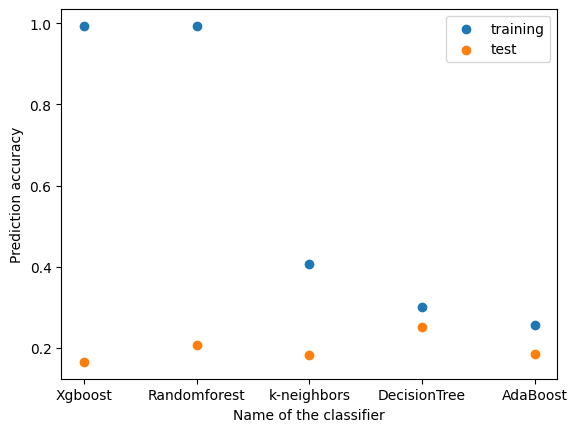

In [54]:
import matplotlib.pyplot as plt

Test_names = ['Xgboost','Randomforest','k-neighbors','DecisionTree', 'AdaBoost']
name_code = ['XG', 'RF', 'KNN', 'DTR', 'ADA']

training = []
test = []

training.append(model_xg.score(X_train, y_train))
training.append(model_rfr.score(X_train, y_train)) 
training.append(model_knr.score(X_train, y_train))
training.append(model_cart.score(X_train, y_train))
training.append(model_ada.score(X_train, y_train))

test.append(model_xg.score(X_test, y_test))
test.append(model_rfr.score(X_test, y_test)) 
test.append(model_knr.score(X_test, y_test))
test.append(model_cart.score(X_test, y_test))
test.append(model_ada.score(X_test, y_test))

plt.scatter(Test_names,training,label='training')
plt.scatter(Test_names,test,label='test')
plt.xlabel('Name of the classifier')
plt.ylabel('Prediction accuracy')
plt.legend()
plt.savefig('initial-model-accuracy-comparisons.png')

In [55]:
#According to the training and test accuracies we can decide the RandomForest is better than others to train and test our dataset

# Feature Importance

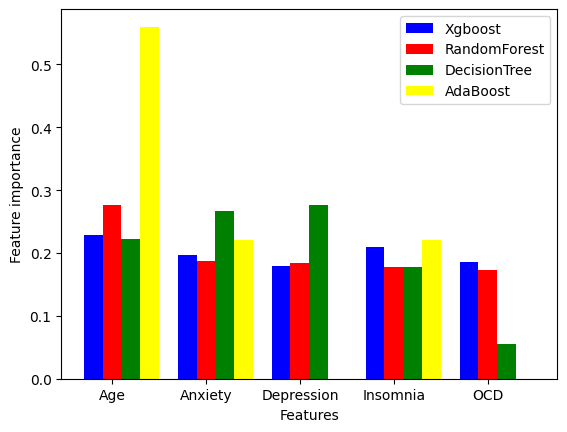

In [56]:
x = np.arange(5)
width = 0.2

plt.bar(x-0.2,xg_feature_importances,width, color='blue')
plt.bar(x,rfr_feature_importances, width, color='red')
plt.bar(x+0.2,cart_feature_importances,width, color='green')
plt.bar(x+0.4,ada_feature_importances,width, color='yellow')

plt.xticks(x, feature_names)
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.legend(["Xgboost", "RandomForest", "DecisionTree","AdaBoost"])
plt.savefig('feature-importance-compare.png')